In [85]:
from PIL import Image as im
import pandas as pd
import os, os.path,time
import csv
import matplotlib.pyplot as plt
import numpy as np

In [86]:
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

#load the original image from the folder "testofimagetocsv"


In [87]:
myFileList = createFileList('D:/age-and-gender-detection-main/testing')
myFileList

D:/age-and-gender-detection-main/testing


['D:/age-and-gender-detection-main/testing\\35_1_1_20170116233055885.jpg.chip.jpg',
 'D:/age-and-gender-detection-main/testing\\35_1_1_20170117154230213.jpg.chip.jpg',
 'D:/age-and-gender-detection-main/testing\\35_1_2_20170112191512046.jpg.chip.jpg']

In [88]:
new_dict = {
    'sn':[],
    'age':[],
    'gender':[],
    'image_name':[],
    'pixel':[]
    }
df = pd.DataFrame(new_dict)
for en,file in enumerate(myFileList):
    print(file)
    img_file = Image.open(file)
    width, height = img_file.size
    
    print('width,height',width,height) 
    #ans is 200 200

    format=img_file.format
    mode=img_file.mode

    #converting into gray scale
    #here L is single channel mode which is generally for converting into greyscale
    img_grey = img_file.convert('L')
    
    #converting into numpyarray
    #value=np.asarray(img_grey)
    value=np.asarray(img_grey.getdata(),dtype=np.int).reshape((img_grey.size[1],img_grey.size[0]))
    # print('value:',type(value),value)    
    
    #pandas feature 2d to 1d 
    value=value.flatten()
    # print(type(value))
    # print(value.shape)
    tostr = lambda x: [str(y) for y in x]
    
    name_array = ' '.join(tostr(value))
    # print(name_array)
    # ,age,gender,image_name,pixel
    # print(new_data)
    df.loc[en] = [1,12,0,'apple.jpg',name_array]
df.to_csv('dataset.csv',index=False)    

D:/age-and-gender-detection-main/testing\35_1_1_20170116233055885.jpg.chip.jpg
width,height 200 200
D:/age-and-gender-detection-main/testing\35_1_1_20170117154230213.jpg.chip.jpg
width,height 200 200
D:/age-and-gender-detection-main/testing\35_1_2_20170112191512046.jpg.chip.jpg
width,height 200 200


In [89]:
df = pd.read_csv('dataset.csv')
df.head()

,sn,age,gender,image_name,pixel
0,1.0,12.0,0.0,apple.jpg,52 54 58 61 64 64 64 63 63 66 70 72 74 77 80 8...
1,1.0,12.0,0.0,apple.jpg,83 80 76 73 66 54 38 26 15 16 17 17 16 15 13 1...
2,1.0,12.0,0.0,apple.jpg,67 68 67 63 58 57 61 64 68 77 88 97 101 101 99...


Checking GreyScale or not

In [90]:
data=pd.read_csv("../dataset/age_gender.csv")
data.head()

,age,gender,img_name,pixels
0,1,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [91]:
#convert pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
data.head()

,age,gender,img_name,pixels
0,1,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [92]:
X = np.array(data['pixels'].tolist())
print(X)

[[129. 128. 128. ... 146. 146. 146.]
 [164.  74. 111. ... 182. 170. 148.]
 [ 67.  70.  71. ... 112. 111. 108.]
 ...
 [ 59.  50.  37. ...  98.  78.  78.]
 [ 45. 108. 120. ...  32.  35.  35.]
 [156. 161. 160. ... 190. 184. 174.]]


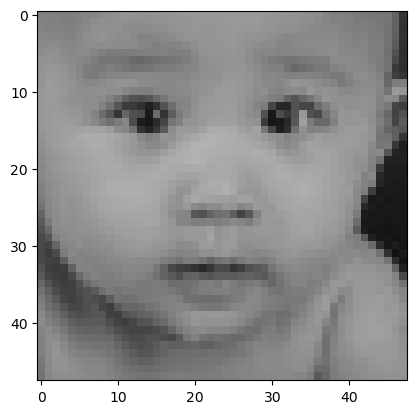

In [97]:
data = np.reshape(X[0], (48, 48))
data = im.fromarray(data)
imgg = plt.imshow(data)
plt.show(imgg)
# # saving the final output 
# # as a PNG file
# data.save('greyOrnot.png')